# Homework - Stage 1

##  Byte Benders - TIM 7

Alvin Arianda

Cut Sari Natasya

Dwi Damara Kartikasari

Limatan Luviar

Muhammad Hadi Dermawan

Nofri Rhamawati

Sulami Hauzana Assyifa

# Descripton and Background Data

- **Context**
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- **Content**
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
- Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

- **Inspiration**
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

- **Tasks to Solve** :
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

**About this file** 

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

1. CustomerID
Unique customer ID
2. ProdTaken
Unique customer ID
3. Age
Age of customer
4. TypeofContact
How customer was contacted (Company Invited or Self Inquiry)
5. CityTier
City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. DurationOfPitch
Duration of the pitch by a salesperson to the customer
7. Occupation
Occupation of customer
8. Gender
Gender of customer
9. NumberOfPersonVisiting
Total number of persons planning to take the trip with the customer
10. NumberOfFollowups
Total number of follow-ups has been done by the salesperson after the sales pitch
11. ProductPitched
Product pitched by the salesperson
12. PreferredPropertyStar
Preferred hotel property rating by customer
13. MaritalStatus
Marital status of customer
14. NumberOfTrips
Average number of trips in a year by customer
15. Passport
The customer has a passport or not (0: No, 1: Yes)
16. PitchSatisfactionScore
Sales pitch satisfaction score
17. OwnCar
Whether the customers own a car or not (0: No, 1: Yes)
18. NumberOfChildrenVisiting
Total number of children with age less than 5 planning to take the trip with the customer
19. Designation
Designation of the customer in the current organization
20. MonthlyIncome
Gross monthly income of the customer

# Load And Describe Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv('Travel.csv')

In [5]:
df.shape

(4888, 20)

In [6]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
669,200669,1,39.0,Self Enquiry,1,12.0,Small Business,Male,3,3.0,Basic,5.0,Divorced,1.0,1,2,1,1.0,Executive,17404.0
258,200258,0,51.0,Self Enquiry,1,6.0,Salaried,Male,3,3.0,Basic,3.0,Divorced,2.0,0,4,1,0.0,Executive,17723.0
578,200578,0,38.0,Company Invited,1,8.0,Salaried,Female,3,1.0,Deluxe,5.0,Single,7.0,1,2,1,2.0,Manager,20980.0
788,200788,0,NaN,Self Enquiry,1,16.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,4.0,0,4,1,1.0,Manager,18660.0
3625,203625,0,50.0,Self Enquiry,1,13.0,Salaried,Female,3,5.0,Super Deluxe,3.0,Married,4.0,1,5,1,1.0,AVP,32644.0


# Descriptive Statistics

### Cek tipe data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Describe

In [8]:
df.select_dtypes(include='number').describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [9]:
df.select_dtypes(exclude='number').describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [10]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

- A. Semua tipe data sudah sesuai
- B. Nilai kosong pada kolom Age, TypeOfContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar,  NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome
- C. NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, dan MonthlyIncome memiliki perbedaan nilai mean dan median yang cukup tinggi dan pada Gender terdapat 3 unique value

# Explatory Data Analysis

In [11]:
# df_raw = df.copy()

### Kategorikal dan Numerikal

In [12]:
nums = df.select_dtypes(exclude='object').columns.tolist()
cats = df.select_dtypes(include='object').columns.tolist()

In [13]:
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [14]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


## Univariate Analysis

### Numerikal

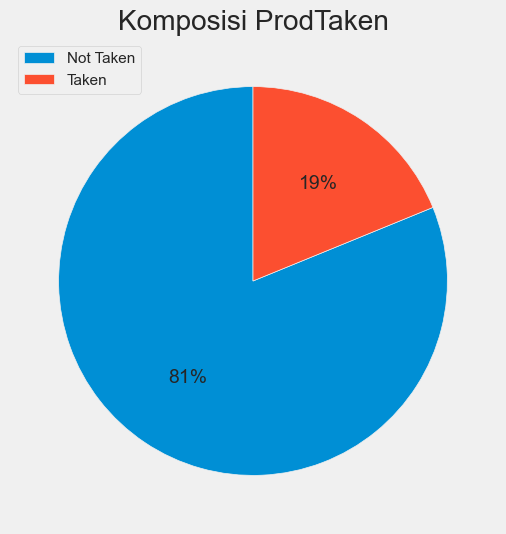

In [15]:
plt.figure(figsize=(6, 6))
target_counts = df['ProdTaken'].value_counts()
plt.pie(target_counts, autopct='%1.0f%%', startangle=90)
plt.title('Komposisi ProdTaken')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

In [16]:
target_pt = (df[['ProdTaken']]
            .groupby('ProdTaken')
            .agg(Count=('ProdTaken','count'))
            .sort_values(by=["Count"], ascending=False)
            .reset_index()
            )
target_pt

,ProdTaken,Count
0,0,3968
1,1,920


In [17]:
# Menghitung nilai terhadap 'ProdTaken' dan mengubah indeks
df_raw_index = df['ProdTaken'].value_counts(normalize=True) * 100
df_raw_index = df_raw_index.reset_index()
df_raw_index['index'] = df_raw_index['index'].map({0: 'Not taken', 1: 'Taken'})
df_raw_index = df_raw_index.set_index('index')
df_raw_index

,ProdTaken
index,
Not taken,81.178396
Taken,18.821604


Terdapat sekitar 81.18% yang tidak mengambil Wellness Tourism Package yang setara dengan 3968 Customer dengan ProdTaken = 0. sementara hanya 18.82% pelanggan yang mengambil Wellness Tourism Package yang setara dengan 920 Customer dengan ProdTaken = 1. ini mengindikasikan bahwa Wellness Tourism Package kurang diminati oleh customer.

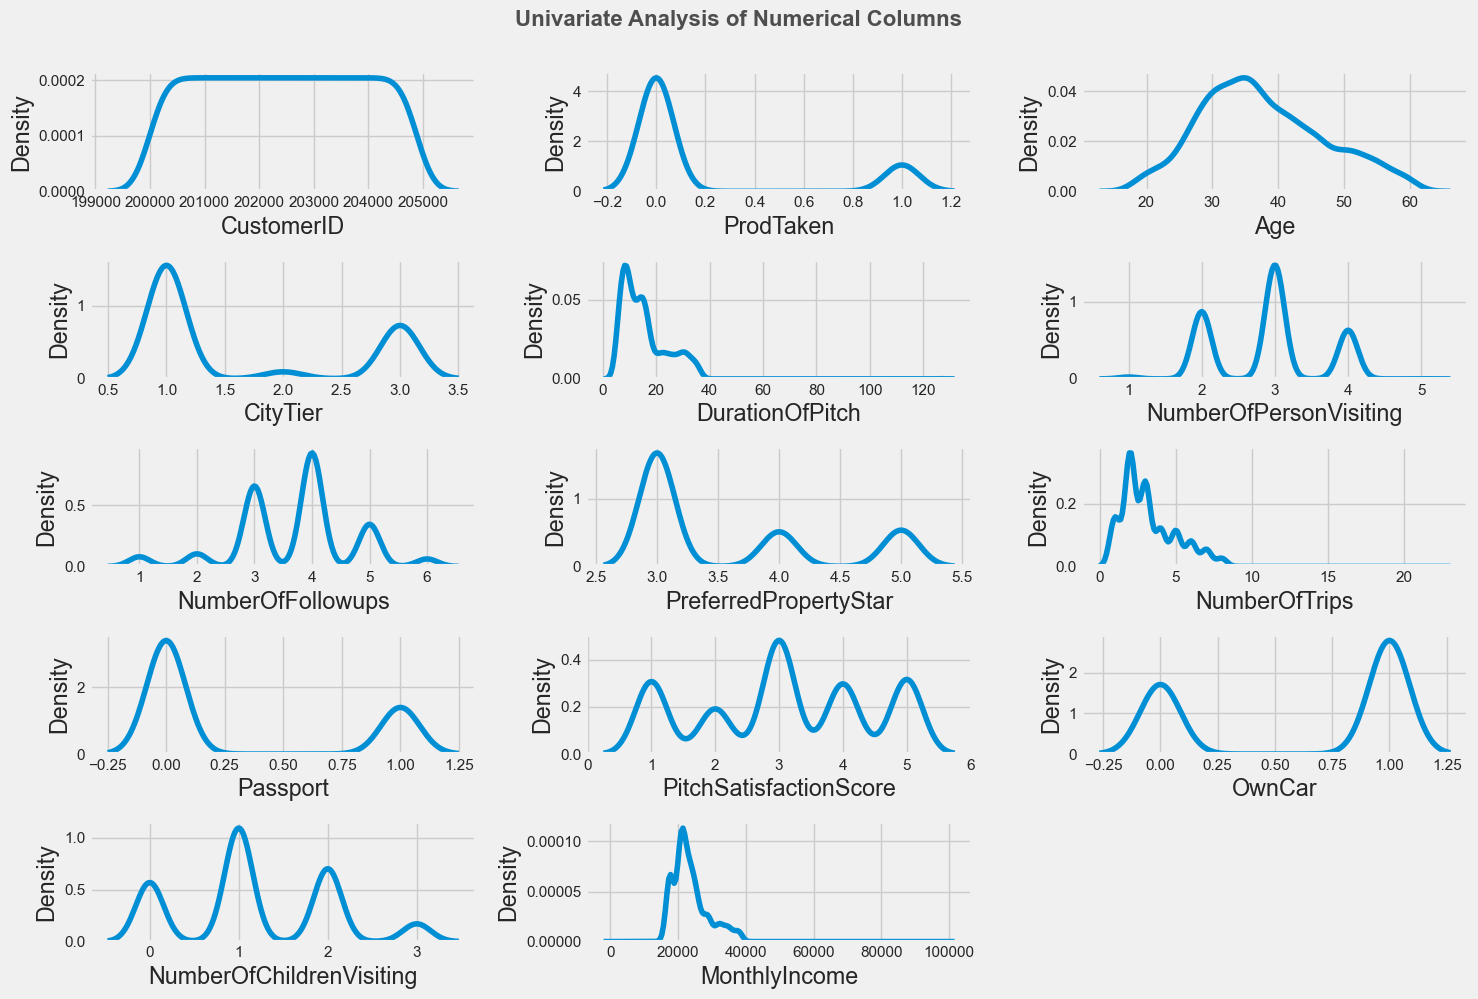

In [18]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()
   
# save plot
plt.show()

Kesimpulan:

Kolom CustomerID memiliki terlalu banyak data yang tersebar, mungkin karena pelanggan di setiap baris selalu unik, sehingga kolom tersebut nantinya dapat dihapus.
Kolom Age tampaknya berdistribusi normal.
Kolom DurationOfPitch, NumberOfTrips, dan MonthlyIncome tampaknya memiliki distribusi data yang condong positif (condong ke kanan), yang menunjukkan adanya outlier.
Kolom lain dapat diabaikan karena sebenarnya merupakan tipe data diskrit atau ordinal.

### Kategorikal

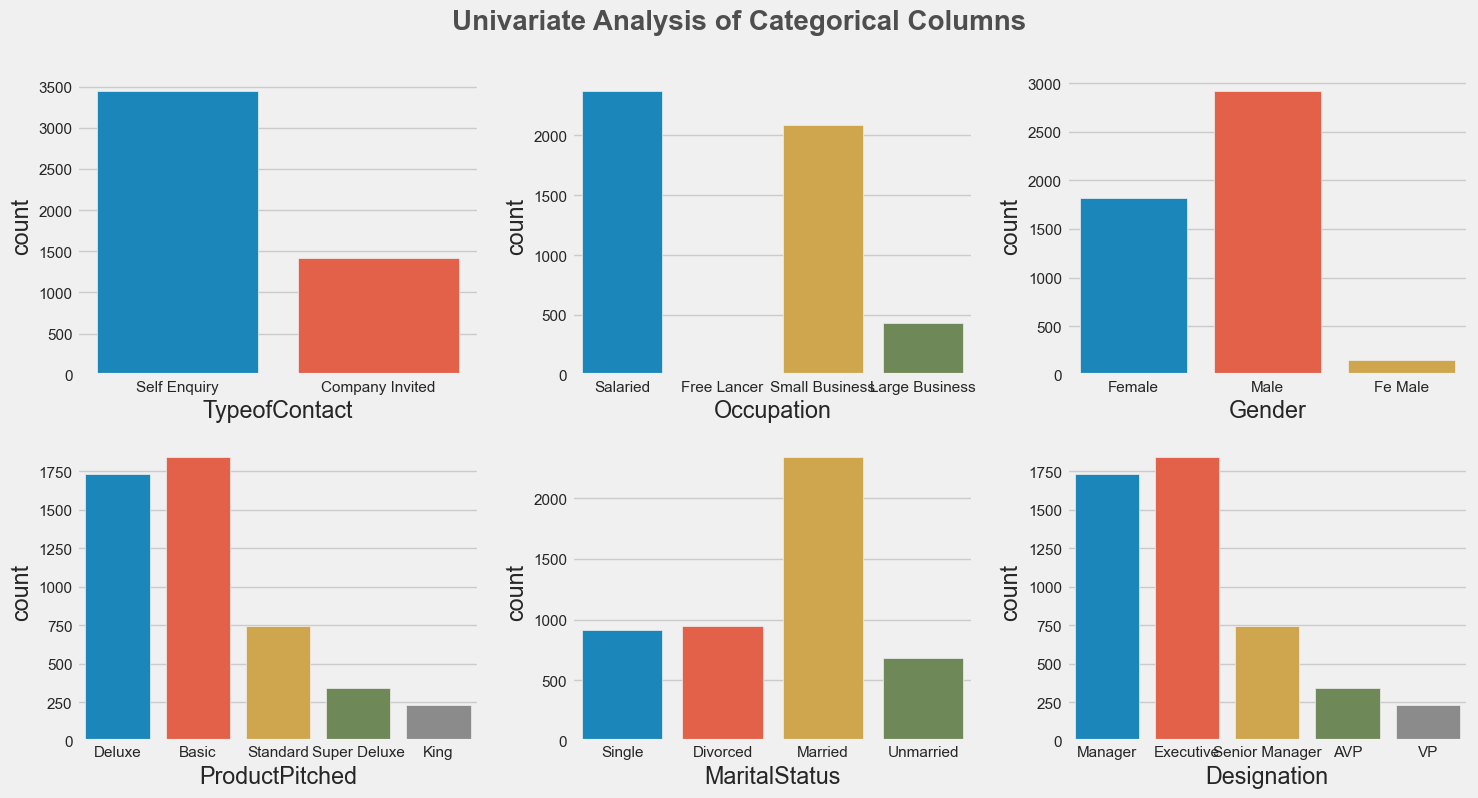

In [19]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cats[i]])

plt.tight_layout()
plt.show()

Kesimpulan:

Lebih dari setengah data pada kolom TypeofContact berasal dari kategori Self Enquiry.
Kategori Salaried dan Small Business mendominasi kolom Occupation, namun jumlah Free Lancer terlalu sedikit untuk dipertimbangkan.
Jumlah individu dengan jenis kelamin laki-laki lebih banyak daripada perempuan pada kolom Gender. Perlu dilakukan perbaikan penulisan kategori Fe Male menjadi Female.
Dua kategori mendominasi kolom ProductPitched dan Designation.
Status Married mendominasi kolom MaritalStatus. Selain itu, status Single dan Unmarried dapat dianggap sama dan digabungkan

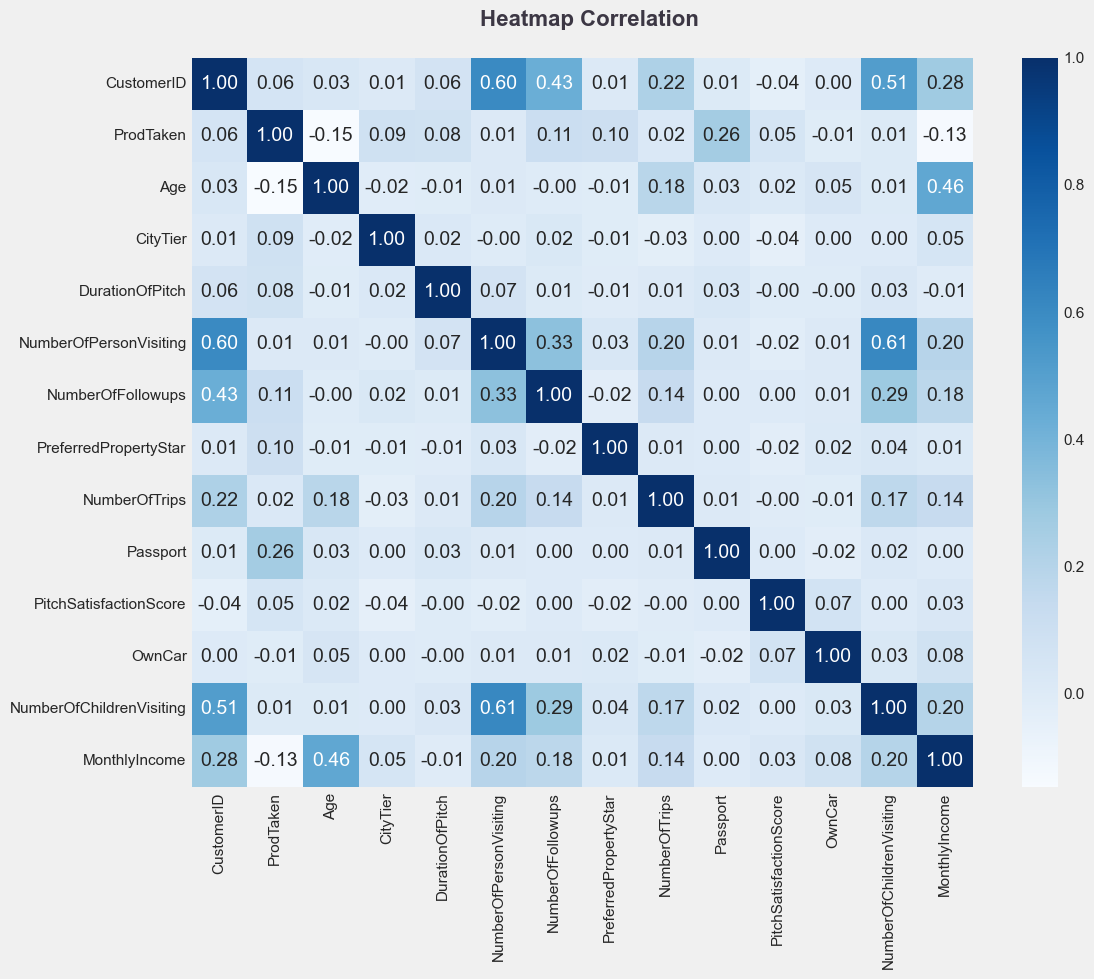

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [21]:
# Kesimpulan

## Bivariate Analysis

In [22]:
df_raw = df.copy()

In [23]:
df_raw['ProdTaken_YN'] = df_raw['ProdTaken'].apply(lambda x: 'Yes' if x == 1 else 'No')

### Cats Vs ProdTaken

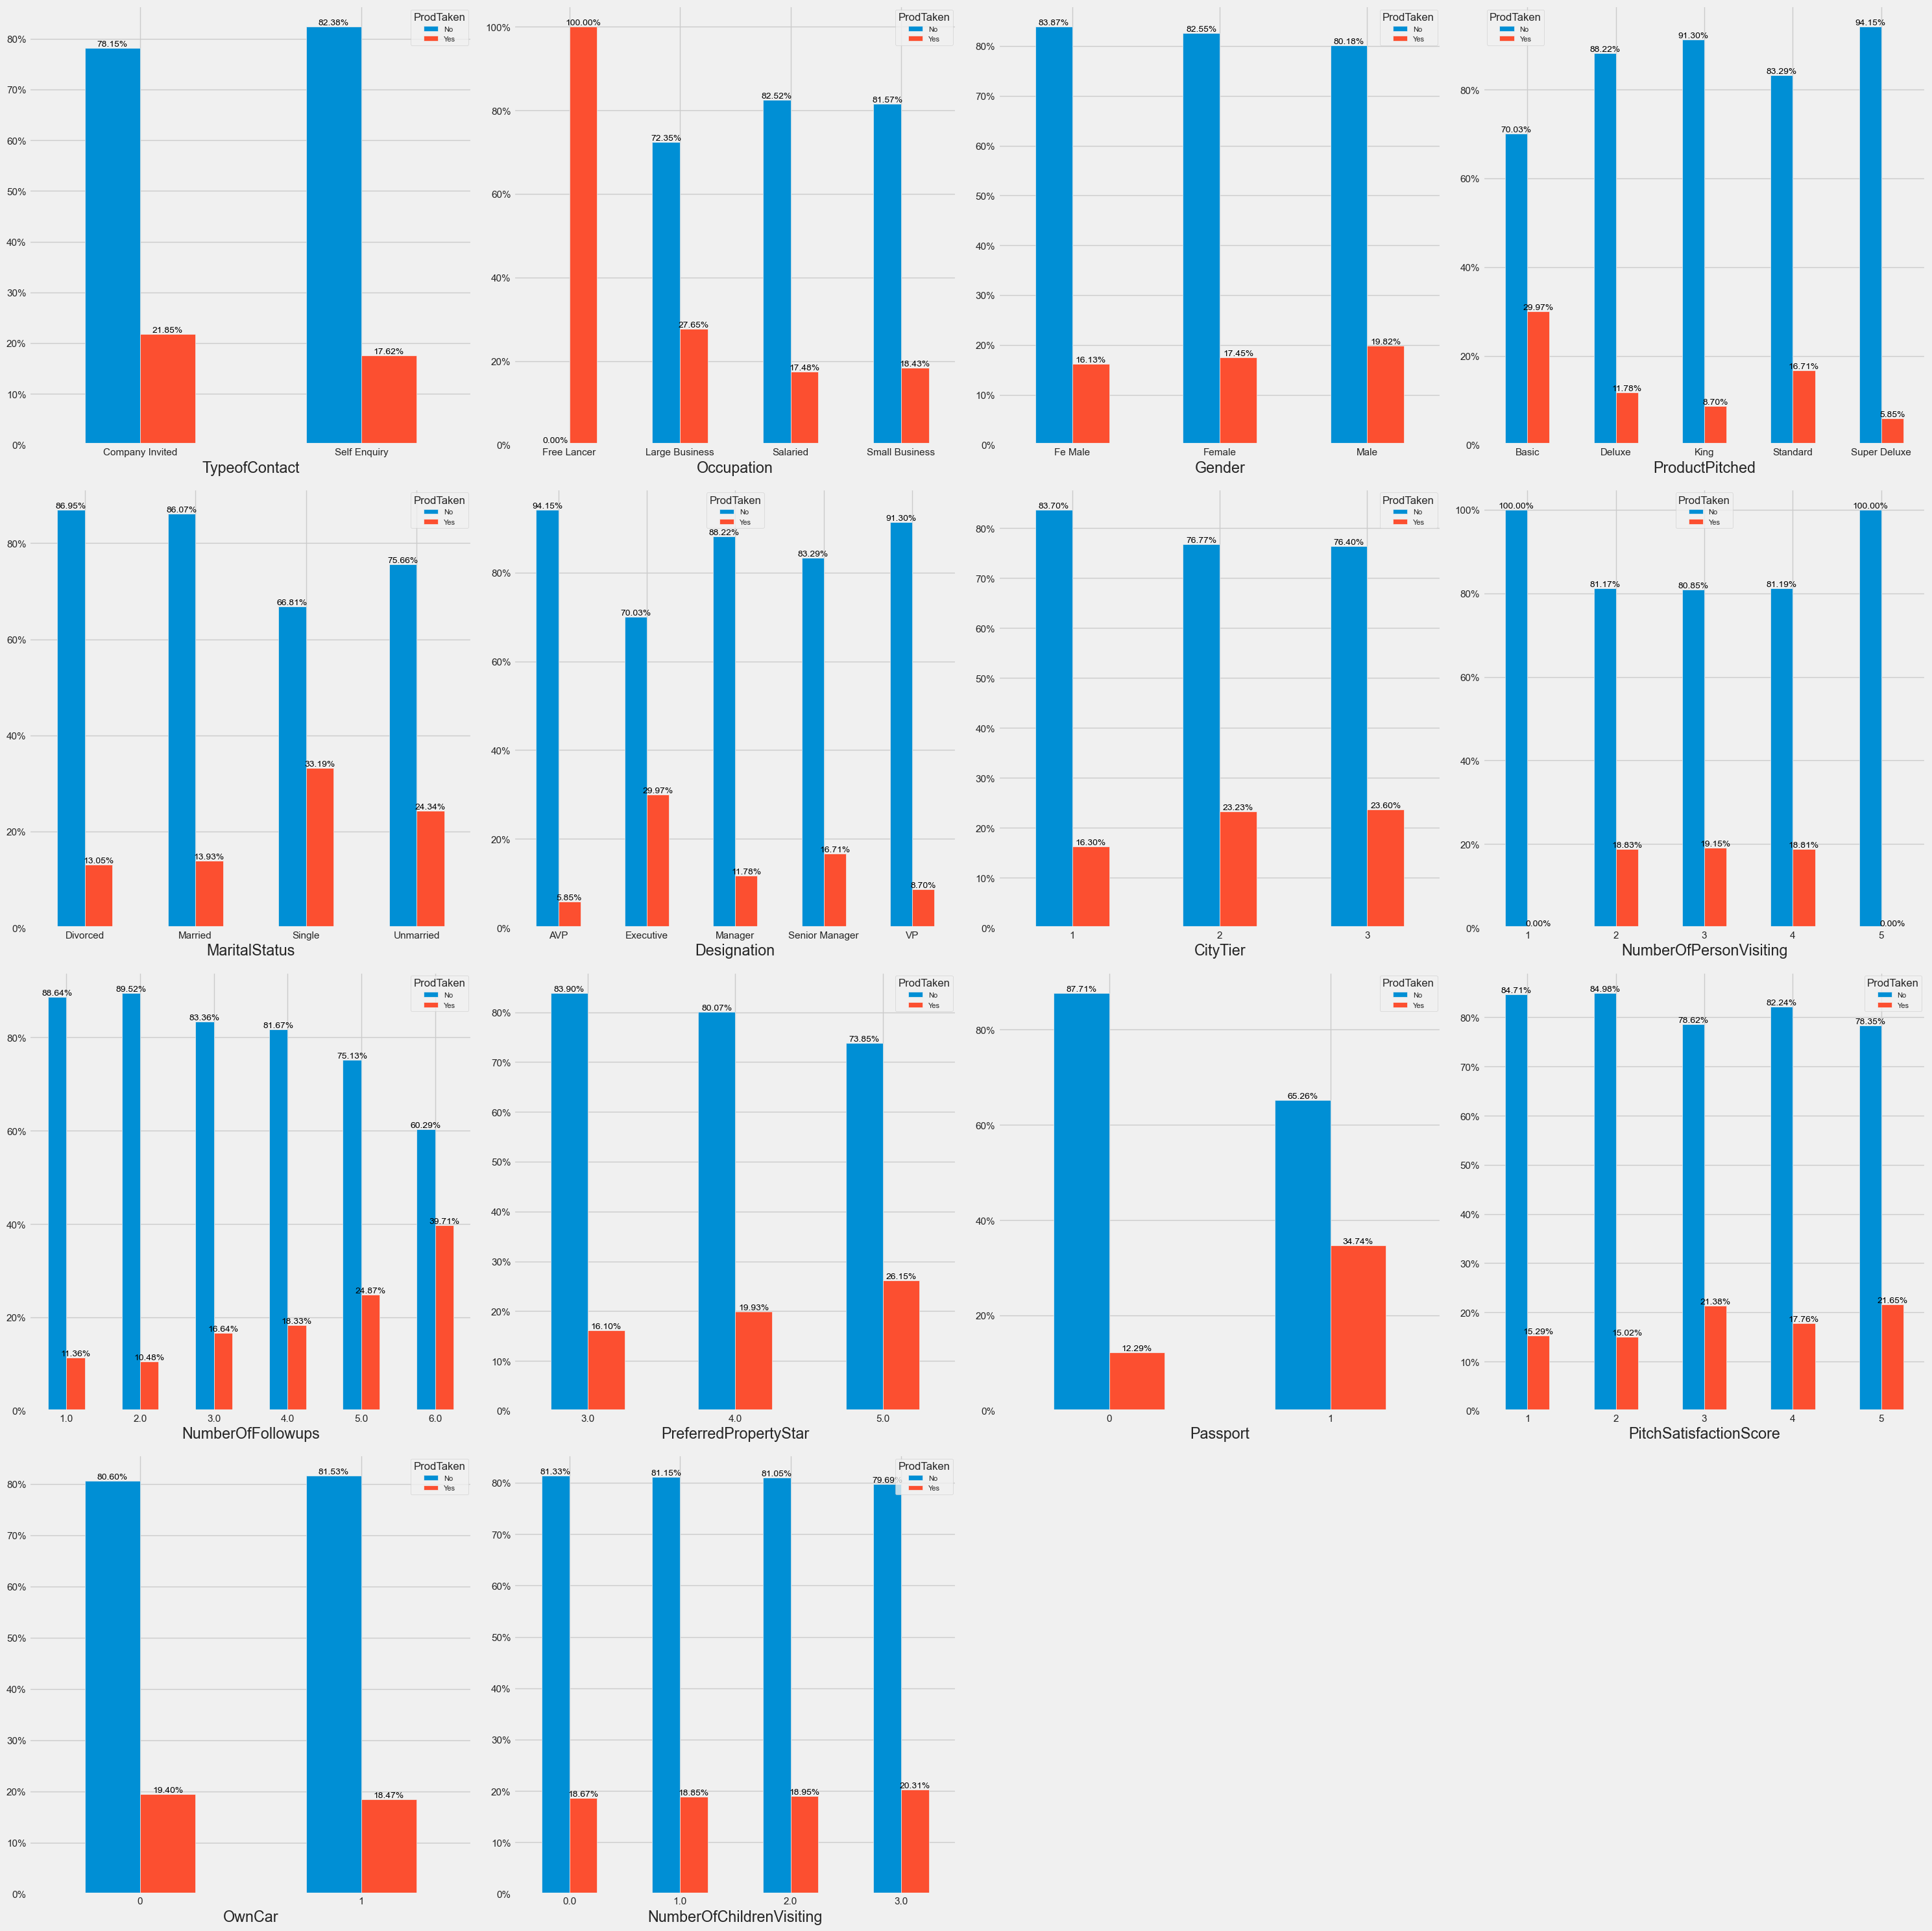

In [24]:
cats_2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
          'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
          'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

# Menghitung proporsi nilai kolom 'ProdTaken_YN' untuk setiap kategori dalam setiap variabel
plt.figure(figsize=(30, 30))

# Menggunakan enumerate untuk mendapatkan nomor subplot dan nilai cat dari cats_2
for i, cat in enumerate(cats_2, 1):
    # Menampilkan subplot dalam grid 4x4
    plt.subplot(4, 4, i)
    data = df_raw.groupby(cat)['ProdTaken_YN'].value_counts(normalize=True).unstack('ProdTaken_YN')
    ax = data.plot(kind='bar', ax=plt.gca()) 
    
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.xlabel(cat)
    plt.legend(title="ProdTaken",prop={'size': 8})
    
    # Menambahkan label persentase di atas setiap bar
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{height:.2%}',
            ha='center', va='bottom', color='black', fontsize=10
        )
    
    plt.xticks(rotation=0)

plt.tight_layout() 
plt.show()

In [25]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_raw['ProdTaken'] = le.fit_transform(df_raw['ProdTaken'])

# Fitur kategorikal yang ingin dianalisis
categorical_features = cats_2

# Melakukan uji ANOVA untuk setiap fitur kategorikal terhadap target variabel
for feature in categorical_features:
    categories = df_raw[feature].unique()
    anova_results = []
    for category in categories:
        group = df_raw[df_raw[feature] == category]['ProdTaken']
        anova_results.append(group)
    f_statistic, p_value = f_oneway(*anova_results)
    
    print(f'Feature: {feature}')
    print(f'F-statistic: {f_statistic}, p-value: {p_value}')
    if p_value < 0.05: 
        print("Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'")
    else:
        print("Tidak cukup bukti untuk menolak hipotesis nol")
    print('-' * 50)

Feature: TypeofContact
F-statistic: nan, p-value: nan
Tidak cukup bukti untuk menolak hipotesis nol
--------------------------------------------------
Feature: Occupation
F-statistic: 11.320239710315109, p-value: 2.1344995138241134e-07
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: Gender
F-statistic: 2.447670892554244, p-value: 0.08660088146185731
Tidak cukup bukti untuk menolak hipotesis nol
--------------------------------------------------
Feature: ProductPitched
F-statistic: 68.93647298369976, p-value: 7.431320445187474e-57
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: MaritalStatus
F-statistic: 67.51519835181304, p-value: 8.992872911727544e-43
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: Designation
F-statistic: 68.93647298369

Dari hasil uji ANOVA

TypeofContact: Tidak cukup bukti untuk menolak hipotesis nol. Ini menunjukkan bahwa tidak ada perbedaan signifikan antara grup 'ProdTaken' terkait dengan jenis kontak yang digunakan.

Occupation: Hipotesis nol ditolak, menunjukkan adanya perbedaan yang signifikan antara grup 'ProdTaken' berdasarkan jenis pekerjaan pelanggan. Ini menyarankan bahwa jenis pekerjaan dapat berpengaruh pada keputusan pembelian.

Gender: Tidak cukup bukti untuk menolak hipotesis nol. Ini menunjukkan bahwa tidak ada perbedaan signifikan antara grup 'ProdTaken' berdasarkan jenis kelamin.

ProductPitched: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa produk yang ditawarkan dapat berpengaruh pada keputusan pembelian.

MaritalStatus: Hipotesis nol ditolak, menunjukkan adanya perbedaan yang signifikan antara grup 'ProdTaken' berdasarkan status pernikahan. Ini menyarankan bahwa status pernikahan dapat memiliki pengaruh pada keputusan pembelian.

Designation: Hipotesis nol ditolak, menunjukkan adanya perbedaan yang signifikan antara grup 'ProdTaken' berdasarkan desainasi pelanggan. Ini menunjukkan bahwa desainasi pelanggan dapat memengaruhi keputusan pembelian.

### Nums Vs ProdTaken

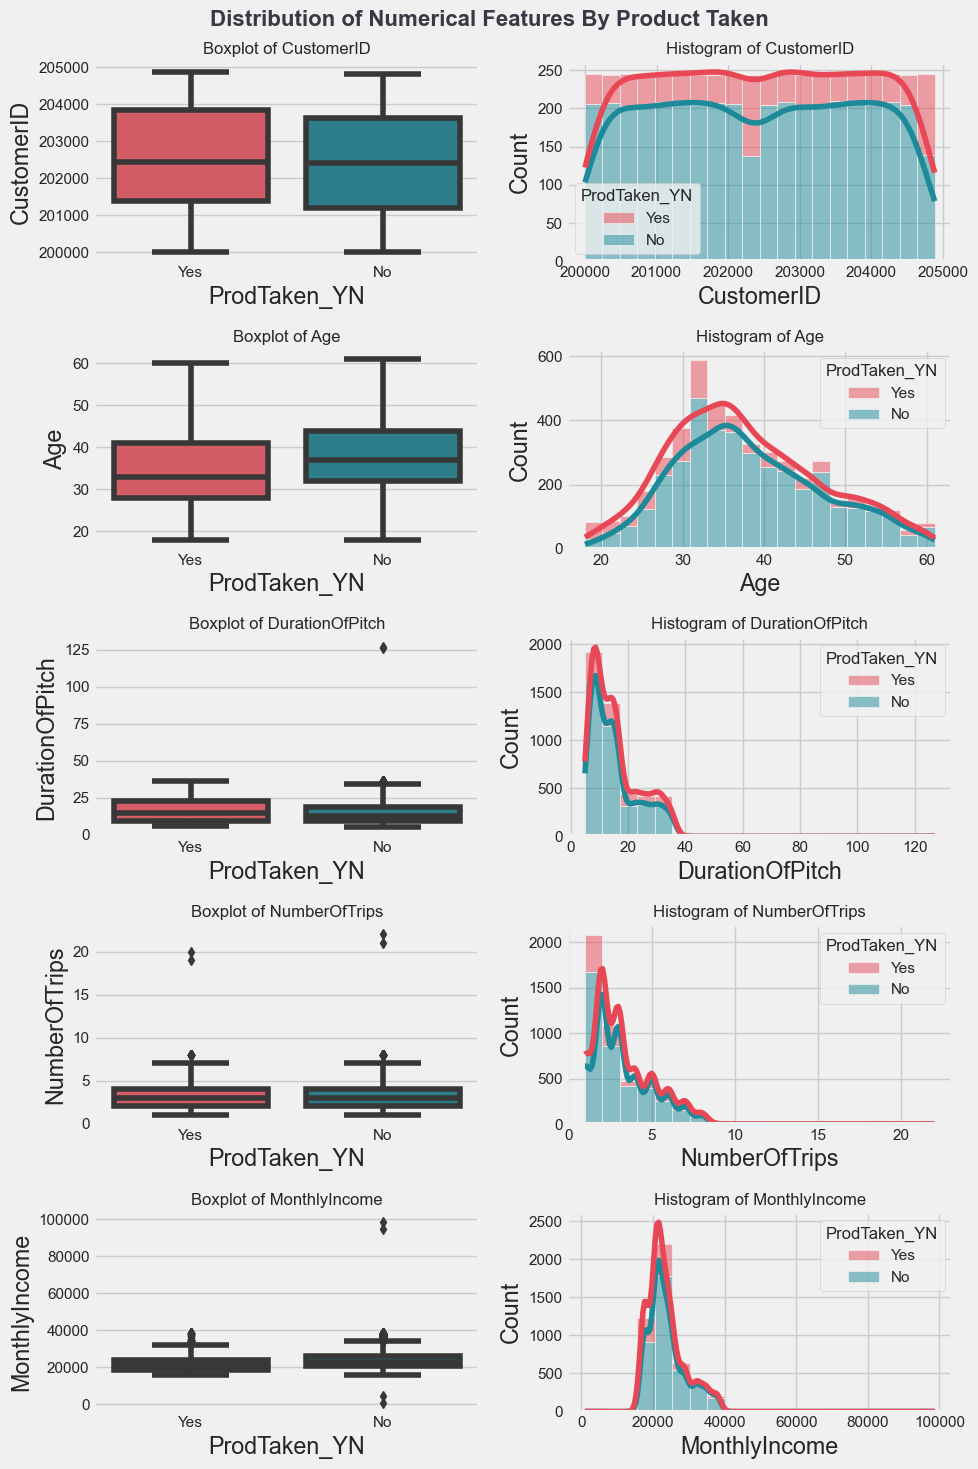

In [26]:
nums_2 = ['CustomerID','Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(nums_2):   
    sns.boxplot(data=df_raw, x='ProdTaken_YN', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df_raw, x=col, hue='ProdTaken_YN', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()

In [27]:
# Menghitung korelasi antara fitur numerik dan target 'ProdTaken'
correlations = df_raw[nums_2].apply(lambda x: x.corr(df_raw['ProdTaken']))
print(correlations)

CustomerID         0.056506
Age               -0.147254
DurationOfPitch    0.078257
NumberOfTrips      0.018898
MonthlyIncome     -0.130585
dtype: float64


Kesimpulan

CustomerID (0.056506): Korelasi positif yang lemah menunjukkan bahwa ada sedikit hubungan antara ID pelanggan dengan keputusan pembelian produk. Hal ini mungkin menunjukkan bahwa ID pelanggan tidak memiliki pengaruh besar terhadap keputusan pembelian.

Age (-0.147254): Korelasi negatif menengah dengan 'ProdTaken' menunjukkan bahwa semakin tua usia seseorang, semakin kecil kemungkinan mereka untuk mengambil produk. Namun, perlu diingat bahwa korelasi tidak menyiratkan sebab akibat langsung.

DurationOfPitch (0.078257): Korelasi positif yang lemah menunjukkan bahwa semakin lama durasi pitch, ada kecenderungan sedikit lebih besar untuk produk diambil. Ini bisa menunjukkan bahwa pemasaran dengan presentasi yang lebih panjang mungkin sedikit lebih berhasil.

NumberOfTrips (0.018898): Korelasi positif yang sangat lemah menunjukkan hubungan yang hampir tidak ada antara jumlah perjalanan dan keputusan pembelian produk. Ini menunjukkan bahwa jumlah perjalanan seorang pelanggan tidak terlalu memengaruhi keputusan mereka untuk mengambil produk.

MonthlyIncome (-0.130585): Korelasi negatif menengah antara pendapatan bulanan dengan 'ProdTaken' menunjukkan bahwa semakin tinggi pendapatan bulanan, semakin kecil kemungkinan mereka untuk mengambil produk. Ini bisa menimbulkan interpretasi bahwa orang dengan pendapatan lebih tinggi mungkin kurang termotivasi untuk mengambil produk atau memiliki preferensi lain.

In [28]:
from scipy import stats

features = nums_2

for feature in features:
    prod_taken_0 = df_raw[df_raw['ProdTaken'] == 0][feature]
    prod_taken_1 = df_raw[df_raw['ProdTaken'] == 1][feature]
    
    t_stat, p_value = stats.ttest_ind(prod_taken_0.dropna(), prod_taken_1.dropna())
    
    print(f"Feature: {feature}")
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
    if p_value < 0.05: 
        print("Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'")
    else:
        print("Tidak cukup bukti untuk menolak hipotesis nol")
    print("-" * 50)

Feature: CustomerID
t-statistic: -3.956077709089845, p-value: 7.727008605788486e-05
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: Age
t-statistic: 10.162968672912964, p-value: 5.1550957936007864e-24
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: DurationOfPitch
t-statistic: -5.344213594222458, p-value: 9.516584004909209e-08
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
--------------------------------------------------
Feature: NumberOfTrips
t-statistic: -1.302105582812854, p-value: 0.19294348402445385
Tidak cukup bukti untuk menolak hipotesis nol
--------------------------------------------------
Feature: MonthlyIncome
t-statistic: 8.984507941073279, p-value: 3.705259842422149e-19
Hipotesis nol ditolak: Ada perbedaan signifikan antara grup 'ProdTaken'
----------------------------------------

dari hasil uji t-test

CustomerID: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa ID pelanggan dapat memiliki pengaruh yang signifikan terhadap keputusan pembelian.

Age: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa usia dapat memainkan peran penting dalam keputusan pembelian.

DurationOfPitch: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini mengindikasikan bahwa durasi presentasi memiliki pengaruh yang signifikan terhadap keputusan pembelian.

NumberOfTrips: Tidak cukup bukti untuk menolak hipotesis nol, yang berarti tidak ada perbedaan signifikan antara grup 'ProdTaken' terkait dengan jumlah perjalanan.

MonthlyIncome: Hipotesis nol ditolak, menunjukkan perbedaan yang signifikan antara grup 'ProdTaken'. Ini menunjukkan bahwa pendapatan bulanan dapat memiliki pengaruh yang signifikan terhadap keputusan pembelian.

Kesimpulan dari Visualisasi dan Test yang dilakukan adalah sebagai berikut:

1. Nama kolom dan tipe data sudah sesuai , tetapi ada kesalahan data pada kolom Gender seperti unique value Female dan Fe Male dan kesamaan makna data pada kolom Marital Status.  
2. Terdapat missing values pada kolom Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact.  
3. Terdapat outlier pada kolom DurationOfPitch, NumberOfTrips, MonthlyIncome.  
4. Telah ditemukan baris yang duplikat pada dataset yang digunakan.
5. Pada kolom numerik menggunakan t-test sebagai uji hipotesis, Hasil t-test memberikan penegasan lebih lanjut terhadap analisis sebelumnya. Variabel seperti CustomerID, Age, DurationOfPitch, dan MonthlyIncome memiliki korelasi yang signifikan dengan keputusan pembelian, sementara NumberOfTrips tidak memperlihatkan pengaruh yang kuat.  
6. Pada kolom numerik Kolom CustomerID bisa dihapus karena setiap baris memiliki customer id yang berbeda-beda dan Kolom ProdTaken adalah target yang akan diprediksi.  
7. Kolom numerik yang terlihat memiliki korelasi terhadap target dapat digunakan sebagai fitur, yaitu Age, MontlyIncome, NumberOfFollowups dan Passport.  
8. Kolom NumberOfPersonVisiting dan NumberOfChildrenVisiting memiliki korelasi positif cukup kuat sehingga bisa digabung untuk menjadi fitur baru (TotalVisit).  
9. Beberapa kolom numerik yang terlihat sama sekali tidak berkorelasi terdapat target dapat dihapus.  
10. Pada kolom kategorik bisa dimasukkan fitur, yaitu TypeofContact, Occupation, ProductPitched, MaritalStatus, dan Designation karena berdasarkan hasil pengujian hypothesis menggunakan anova berhasil reject H0 (artinya berkorelasi dengan target).  

## Multivariate Analysis

#### Apakah Duration of Pitch Membuat Customer Tertarik Membeli Paket?

Text(0.5, 1.0, 'Apakah Duration of Pitch Membuat Customer Tertarik Membeli Paket?')

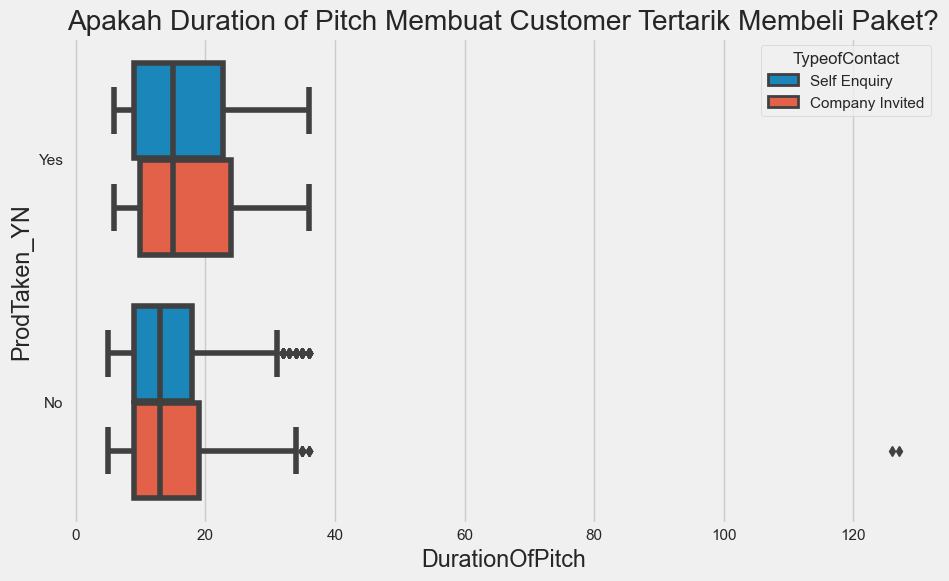

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_raw, x = 'DurationOfPitch', y = 'ProdTaken_YN', hue = 'TypeofContact')
plt.title('Apakah Duration of Pitch Membuat Customer Tertarik Membeli Paket?')

In [30]:
df_cast = df_raw.copy()

#### Product mana yang diminati oleh pelanggan?

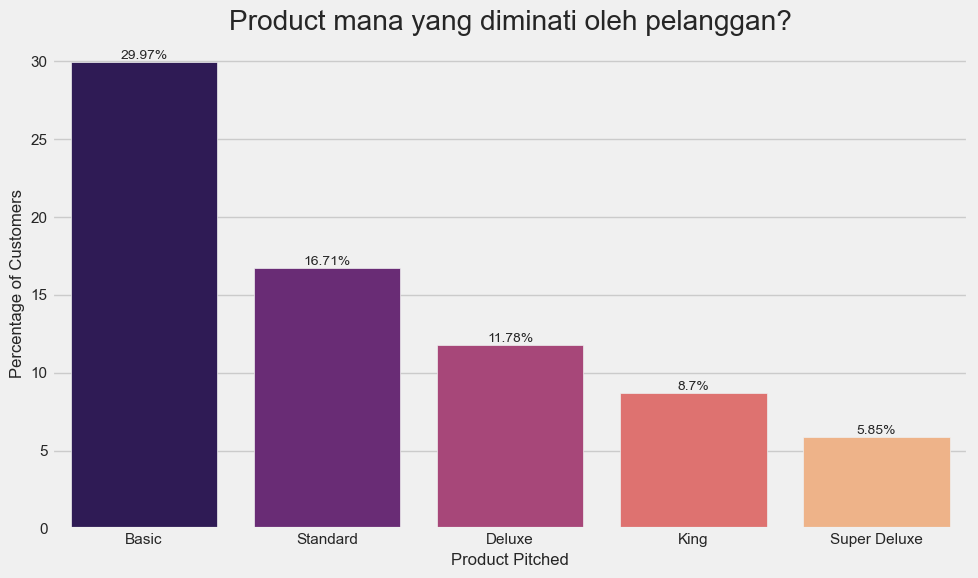

In [31]:
df_p = df_cast.groupby(['ProductPitched', 'ProdTaken_YN'])['CustomerID'].count().reset_index(name='TotalCustomer')\
.merge(df_cast.groupby(['ProductPitched'])['CustomerID'].count(),on ='ProductPitched')
df_p = df_p[df_p.ProdTaken_YN=='Yes'].reset_index(drop=True)
df_p['Perc']=round(df_p.TotalCustomer/df_p.CustomerID*100,2)
df_p = df_p.sort_values(by='Perc', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='ProductPitched', y='Perc', data=df_p, palette='magma')

for idx, value in enumerate(df_p['Perc']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Product Pitched', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Product mana yang diminati oleh pelanggan?')
plt.tight_layout()
plt.show()

Insight

produk dengan nama Basic memiliki jumlah pelanggan yang membeli tertinggi (552 pelanggan atau sekitar 29.97%). Ini menunjukkan bahwa produk Basic lebih diminati dibandingkan dengan produk lainnya dalam kategori ini.

Secara relatif, produk Basic memiliki tingkat konversi yang lebih tinggi dibandingkan dengan produk lainnya seperti Standard, Deluxe, King, dan Super Deluxe. Hal ini dapat mengindikasikan bahwa strategi pemasaran atau keunggulan produk pada kategori Basic mungkin lebih menarik bagi pelanggan dan memiliki daya tarik yang lebih besar dalam membuat keputusan pembelian.

#### Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?

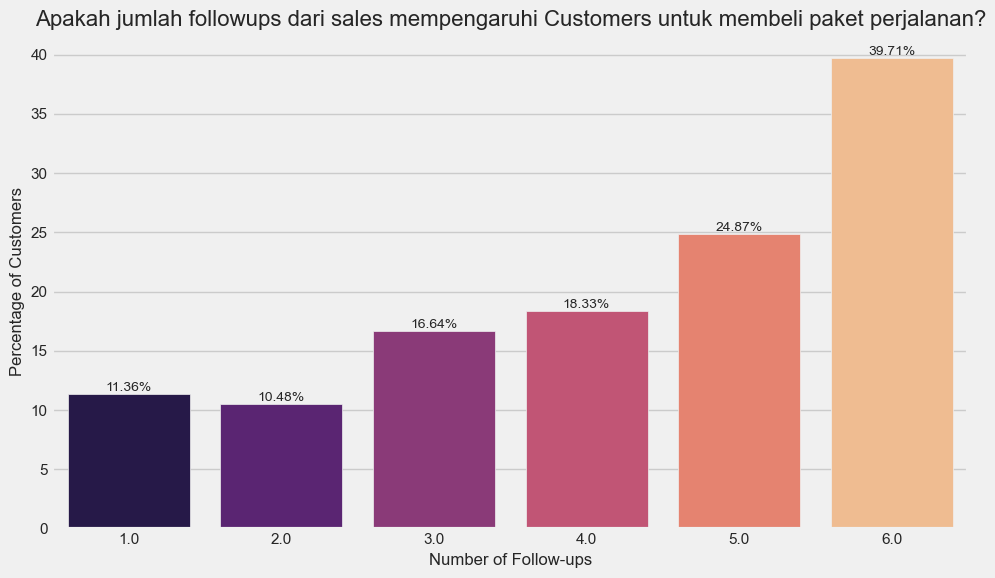

In [32]:
import pandas as pd

# Menghitung total pelanggan
total_customers = df_cast.groupby(['NumberOfFollowups', 'ProdTaken_YN'])['CustomerID'].count().reset_index(name='TotalCustomers')

# Menghitung persentase pelanggan yang mengambil produk
percentage_customers = round(df_cast.groupby(['NumberOfFollowups', 'ProdTaken_YN'])['CustomerID'].count() / df_raw.groupby(['NumberOfFollowups'])['CustomerID'].count() * 100, 2)
percentage_customers = percentage_customers.reset_index(name='PercCust')

# Menggabungkan kedua DataFrame
df_followups = total_customers.merge(percentage_customers, on=['NumberOfFollowups', 'ProdTaken_YN'])
df_followups = df_followups[df_followups.ProdTaken_YN == 'Yes'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfFollowups', y='PercCust', data=df_followups, palette='magma')

for idx, value in enumerate(df_followups['PercCust']):
    plt.text(idx, value, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Number of Follow-ups', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.title('Apakah jumlah followups dari sales mempengaruhi Customers untuk membeli paket perjalanan?', fontsize=16)
plt.tight_layout()
plt.show()

Insight

adanya kecenderungan bahwa semakin banyak jumlah follow-up yang dilakukan oleh sales, semakin tinggi persentase pelanggan yang akhirnya memutuskan untuk membeli paket perjalanan. Presentase pelanggan yang membeli meningkat secara signifikan dari sekitar 11.36% pada satu follow-up menjadi 39.71% pada enam follow-up.

Hal ini menunjukkan adanya korelasi positif antara jumlah follow-up yang dilakukan oleh sales dengan keputusan pelanggan untuk membeli paket perjalanan. Semakin banyak interaksi atau tindak lanjut yang dilakukan, semakin tinggi kemungkinan pelanggan untuk mengambil keputusan pembelian. Hal ini dapat menjadi indikasi bahwa strategi follow-up yang lebih intens memiliki dampak yang positif terhadap peningkatan konversi pelanggan dalam membeli paket perjalanan.

#### Kelompok umur manakah yang lebih banyak membeli paket perjalanan?

In [33]:
print('Data usia dimulai dari {} hingga {}'.format(int(df_cast['Age'].min()), int(df_cast['Age'].max())))

Data usia dimulai dari 18 hingga 61


In [77]:
def kategori_umur(x):
    if x>=18 and x<=25:
        return 'Remaja'
    elif x<=45:
        return 'Dewasa'
    else:
        return 'Lansia'
    
df_cast['kategoriumur'] = df_cast['Age'].apply(lambda x : kategori_umur(x))
kategori_umur = df_cast.groupby(['kategoriumur', 'ProdTaken_YN'])['CustomerID'].count().reset_index(name='TotalCustomers')\
             .merge(df_cast.groupby(['kategoriumur'])['CustomerID'].count().reset_index(name='TotalCustomers'),on='kategoriumur')

df_p = df_p.sort_values(by='Perc',ascending=False)
kategori_umur['Perc']= round(kategori_umur.TotalCustomers_x/kategori_umur.TotalCustomers_y*100,2)
kategori_umur = kategori_umur[kategori_umur.ProdTaken_YN=='Yes'].sort_values('Perc',ascending=False).reset_index(drop=True)
kategori_umur

,kategoriumur,ProdTaken_YN,TotalCustomers_x,TotalCustomers_y,Perc
0,Remaja,Yes,143,347,41.21
1,Dewasa,Yes,589,3341,17.63
2,Lansia,Yes,188,1200,15.67


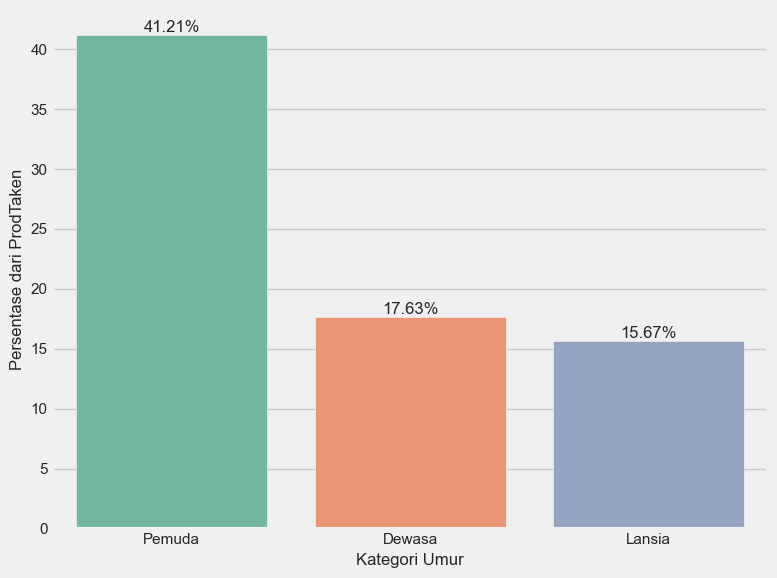

In [35]:
plt.figure(figsize=(8, 6))

# Membuat diagram batang menggunakan Seaborn
sns.barplot(x='kategoriumur', y='Perc', data=kategori_umur, palette='Set2')

# Label sumbu x dan y
plt.xlabel('Kategori Umur', fontsize=12)
plt.ylabel('Persentase dari ProdTaken', fontsize=12)

# Menambahkan label nilai persen pada setiap batang
for index, row in kategori_umur.iterrows():
    plt.text(index, row['Perc'], f'{row["Perc"]:.2f}%', ha='center', va='bottom', fontsize=12)

# Menyesuaikan tata letak visualisasi
plt.tight_layout()
plt.show()

Insight 

kategori Remaja memiliki presentase konversi tertinggi (41.21%) dibandingkan dengan kategori Dewasa (17.63%) dan Lansia (15.67%). Ini menunjukkan bahwa pelanggan dalam kategori Remaja cenderung lebih mungkin untuk mengambil produk perjalanan dibandingkan dengan kategori Dewasa dan Lansia.

Insight yang dapat diambil dari data ini adalah bahwa usia pelanggan, khususnya dalam kategori Remaja, mungkin memiliki pengaruh yang signifikan terhadap keputusan untuk mengambil produk perjalanan. Ini bisa menjadi informasi berharga dalam mengarahkan strategi pemasaran atau penawaran produk perjalanan kepada segmen yang lebih muda.

In [36]:
df_cast.drop_duplicates(inplace=True)

In [153]:
# def segmentasi_durasi(durasi):
#     if durasi <= 9:
#         return 'Pendek'
#     elif 9 < durasi <= 20:
#         return 'Sedang'
#     else:
#         return 'Panjang'

# # Menambahkan kolom baru 'SegmentasiDurasiPitch' berdasarkan DurationOfPitch
# df_cast['SegmentasiDurasiPitch'] = df_cast['DurationOfPitch'].apply(segmentasi_durasi)
# duration_fllwups = df_cast.groupby(['NumberOfFollowups', 'SegmentasiDurasiPitch', 'ProdTaken_YN'])['CustomerID'].count().reset_index()

# # 3. Hitung Presentase Konversi
# duration_fllwups['TotalCustomers'] = duration_fllwups.groupby(['NumberOfFollowups', 'SegmentasiDurasiPitch'])['CustomerID'].transform('sum')
# duration_fllwups['ConversionRate'] = (duration_fllwups['CustomerID'] / duration_fllwups['TotalCustomers']) * 100
# duration_fllwups

#### Apakah Customer dari tiap City Tier yang berbeda memiliki ketertarikan dalam membeli paket perjalanan?

In [118]:
df_citytier = df_cast.groupby(['CityTier', 'ProdTaken_YN'])['CustomerID'].count().reset_index(name='TotalCustomers')\
        .merge(df_cast.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')
df_citytier = df_citytier[df_citytier.ProdTaken_YN=='Yes'].reset_index(drop=True)
df_citytier['Persen']=round(df_citytier.TotalCustomers/df_citytier.CustomerID*100,2)
df_citytier = df_citytier.sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_citytier

,CityTier,ProdTaken_YN,TotalCustomers,CustomerID,Persen
0,3,Yes,354,1500,23.60
1,2,Yes,46,198,23.23
2,1,Yes,520,3190,16.30


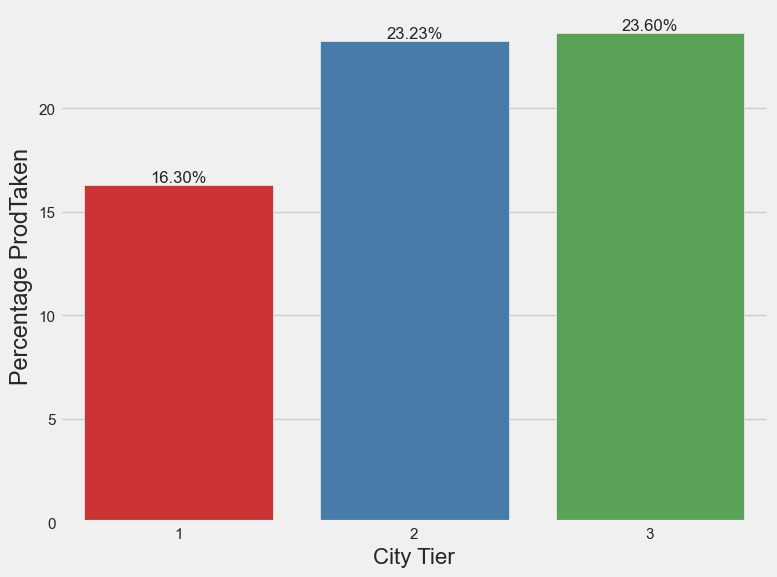

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CityTier', y='Persen', data=df_citytier, palette='Set1')
plt.title('')
plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_citytier.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight

tingkat konversi, atau persentase pelanggan yang telah mengambil produk, ternyata lebih tinggi di CityTier 3 (23.60%) dan CityTier 2 (23.23%) meskipun jumlah pelanggannya lebih sedikit dibandingkan dengan CityTier 1 (16.30%) yang memiliki jumlah pelanggan terbanyak. Hal ini menunjukkan bahwa meskipun jumlah pelanggan bisa lebih sedikit, tingkat konversi yang lebih tinggi di CityTier 3 dan 2 bisa menjadi peluang yang menarik dalam strategi pemasaran, mungkin dengan fokus lebih lanjut pada profil atau preferensi pelanggan di tingkat kota tersebut.

#### Apakah Customers yang memiliki passport lebih tertarik mengambil paket perjalanan?

In [117]:
df_passport = df_cast.groupby(['Passport','ProdTaken_YN']).CustomerID.count().reset_index()\
        .merge(df_cast.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['Persen']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken_YN=='Yes'].sort_values(by='Persen',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken_YN,CustomerID_x,CustomerID_y,Persen
0,1,Yes,494,1422,34.74
1,0,Yes,426,3466,12.29


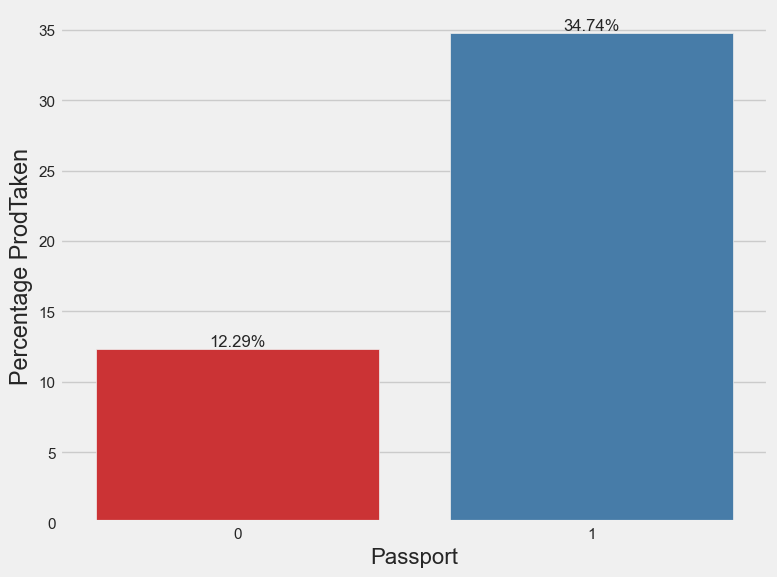

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Passport', y='Persen', data=df_passport, palette='Set1')
plt.title('')
plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken')
data_bars = df_passport.sort_values('Persen', ascending=True)['Persen'].values
for num, text in enumerate(data_bars):
    plt.text(num, text, f'{text:.2f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Insight: 

terdapat perbedaan signifikan dalam persentase pelanggan yang telah mengambil produk antara mereka yang memiliki paspor dan yang tidak memiliki. Proporsi pelanggan yang telah mengambil produk jauh lebih tinggi di antara mereka yang memiliki paspor (34.74%) dibandingkan dengan yang tidak memiliki (12.29%). Hal ini bisa menunjukkan adanya korelasi atau pengaruh antara kepemilikan paspor dengan keputusan pelanggan untuk mengambil produk. Namun, perlu analisis lebih lanjut untuk memahami apakah faktor kepemilikan paspor secara langsung memengaruhi keputusan tersebut atau terdapat faktor lain yang turut berperan dalam pengambilan keputusan pelanggan.

#### Segmentasi MonthlyIncome dan Segmentasi Umur Customers yang mengambiil paket perjalanan

In [149]:
def segmentasi_income(x):
    income = x['MonthlyIncome']
    if 1000 <= income <= 34225:
        segmentasi = 'Low Income'
    elif 34226 <= income <= 67451:
        segmentasi = 'Middle Income'
    else:
        segmentasi = 'High Income'
    return segmentasi

In [150]:
df_cast['segmentasi_income'] = df_cast.apply(lambda x: segmentasi_income(x), axis=1)

In [151]:
gb1 = df_cast.groupby(['segmentasi_income', 'ProdTaken']).agg({'CustomerID':'nunique'}).reset_index()
gb1

,segmentasi_income,ProdTaken,CustomerID
0,High Income,0,203
1,High Income,1,32
2,Low Income,0,3517
3,Low Income,1,856
4,Middle Income,0,248
5,Middle Income,1,32


In [152]:
gb2 = df_cast.groupby('segmentasi_income').agg({'CustomerID':'nunique'}).reset_index()
gb2

,segmentasi_income,CustomerID
0,High Income,235
1,Low Income,4373
2,Middle Income,280


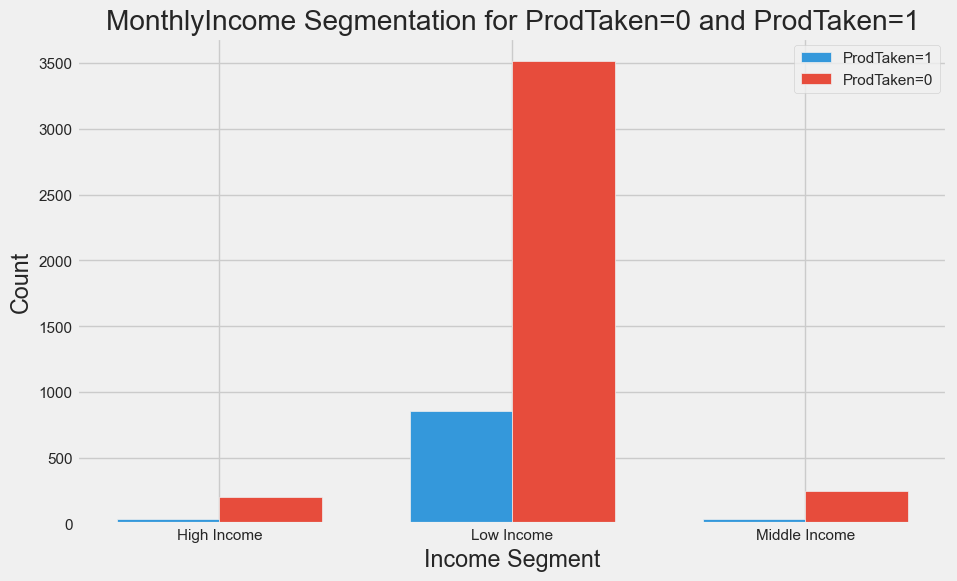

In [98]:
# Assuming 'segmentasi_income' is a categorical variable in your DataFrame
segment_counts_1 = df_cast[df_cast['ProdTaken'] == 1]['segmentasi_income'].value_counts()
segment_counts_0 = df_cast[df_cast['ProdTaken'] == 0]['segmentasi_income'].value_counts()

# Extract unique income segments
income_segments = segment_counts_1.index.union(segment_counts_0.index)

# Set up positions for bars
bar_positions = np.arange(len(income_segments))
bar_width = 0.35

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bar_positions - bar_width/2, segment_counts_1.reindex(income_segments, fill_value=0), bar_width, label='ProdTaken=1', color='#3498db')
ax.bar(bar_positions + bar_width/2, segment_counts_0.reindex(income_segments, fill_value=0), bar_width, label='ProdTaken=0', color='#e74c3c')

ax.set_xticks(bar_positions)
ax.set_xticklabels(income_segments)
ax.set_xlabel('Income Segment')
ax.set_ylabel('Count')
ax.set_title('MonthlyIncome Segmentation for ProdTaken=0 and ProdTaken=1')
ax.legend()

plt.show()

posx and posy should be finite values
posx and posy should be finite values


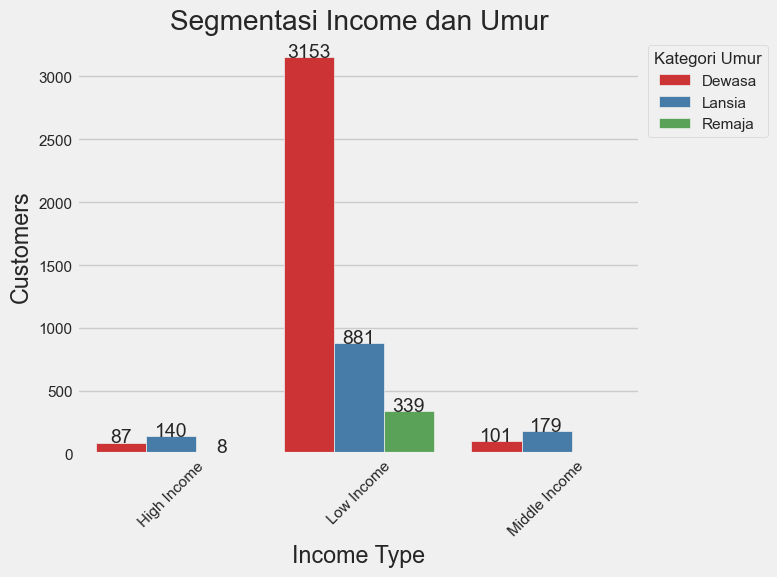

In [114]:
# Pengelompokan ganda berdasarkan segmentasi pendapatan dan segmentasi umur
segmentasi_combined = df_cast.groupby(['segmentasi_income', 'kategoriumur'])['CustomerID'].count().reset_index()

# Visualisasi pengelompokan ganda
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='segmentasi_income', y='CustomerID', hue='kategoriumur', data=segmentasi_combined, palette='Set1')
plt.xlabel('Income Type')
plt.ylabel('Customers')
plt.title('Segmentasi Income dan Umur')
plt.legend(title='Kategori Umur', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Menambahkan label nilai pada setiap bar
for p in plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.0f}', ha='center')

plt.show()


Insight:

Distribusi jumlah pelanggan terlihat berbeda antara segmen pendapatan, dengan segmen Low Income menunjukkan jumlah pelanggan yang paling tinggi, terutama dari kategori Dewasa, sementara segmen High Income memiliki jumlah pelanggan yang lebih rendah secara umum.